In [90]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: c:\apps\miniproj


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지 제거
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [92]:
# 데이터 불러오기
M = pd.read_csv('./month_data.csv', encoding='euc-kr', index_col=0)

In [93]:
M = M.rename(columns = {'외국인 보유금액(조)':'외국인 보유금액(T￦)', '외환보유액(천달러)':'외환보유액(K$)', '미국M2':'미국M2(B$)', '한국M2(십억원)':'한국M2(B￦)', '경상수지':'경상수지(M$)'})

In [94]:
M # 원본데이터

,날짜,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(T￦),외환보유액(K$),미국M2(B$),한국M2(B￦),한국금리,미국금리,경상수지(M$),원달러종가,원달러시가
0,10-Jan,113.6,112.74,116.5,281.9,268917449,8479.15,1574215.8,2.0,0.13,1776.4,1156.5,1166.08
1,10-Feb,114.3,104.80,114.0,277.6,265865270,8487.28,1595403.8,2.0,0.13,322.4,1158.4,1159.80
2,10-Mar,114.7,107.75,113.9,300.8,267567135,8566.14,1607896.1,2.0,0.13,917.1,1130.8,1158.00
3,10-Apr,115.0,110.18,113.6,315.8,274143774,8611.55,1621176.9,2.0,0.13,796.9,1115.5,1129.95
4,10-May,115.1,107.73,113.7,294.4,265595927,8577.66,1630904.7,2.0,0.13,6650.4,1200.2,1109.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,23-Mar,92.2,93.66,92.0,648.7,401730032,21059.53,3811138.9,3.5,4.88,158.1,1303.8,1323.44
159,23-Apr,92.2,96.85,95.1,660.6,402190255,20920.88,3793259.9,3.5,4.88,792.6,1339.9,1306.47
160,23-May,92.4,96.80,98.0,692.2,396787900,20726.76,3785013.0,3.5,5.13,1927.2,1322.2,1338.17
161,23-Jun,92.7,100.60,100.7,690.3,397202408,20806.15,3801207.0,3.5,5.13,5873.7,1312.8,1322.33


## 데이터 가공

In [95]:
mdate = M['날짜'] # regression에 불필요하니 날짜 분리

In [96]:
y = M['원달러종가'] # label
X = M.drop(['날짜', '원달러종가'], axis=1) # features

## 데이터 탐색

In [97]:
X # 가공된 데이터

,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(T￦),외환보유액(K$),미국M2(B$),한국M2(B￦),한국금리,미국금리,경상수지(M$),원달러시가
0,113.6,112.74,116.5,281.9,268917449,8479.15,1574215.8,2.0,0.13,1776.4,1166.08
1,114.3,104.80,114.0,277.6,265865270,8487.28,1595403.8,2.0,0.13,322.4,1159.80
2,114.7,107.75,113.9,300.8,267567135,8566.14,1607896.1,2.0,0.13,917.1,1158.00
3,115.0,110.18,113.6,315.8,274143774,8611.55,1621176.9,2.0,0.13,796.9,1129.95
4,115.1,107.73,113.7,294.4,265595927,8577.66,1630904.7,2.0,0.13,6650.4,1109.05
...,...,...,...,...,...,...,...,...,...,...,...
158,92.2,93.66,92.0,648.7,401730032,21059.53,3811138.9,3.5,4.88,158.1,1323.44
159,92.2,96.85,95.1,660.6,402190255,20920.88,3793259.9,3.5,4.88,792.6,1306.47
160,92.4,96.80,98.0,692.2,396787900,20726.76,3785013.0,3.5,5.13,1927.2,1338.17
161,92.7,100.60,100.7,690.3,397202408,20806.15,3801207.0,3.5,5.13,5873.7,1322.33


In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 162
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   경제심리지수(순환변동치)  163 non-null    float64
 1   뉴스심리지수         163 non-null    float64
 2   소비자심리지수        163 non-null    float64
 3   외국인 보유금액(T￦)   163 non-null    float64
 4   외환보유액(K$)      163 non-null    int64  
 5   미국M2(B$)       163 non-null    float64
 6   한국M2(B￦)       163 non-null    float64
 7   한국금리           163 non-null    float64
 8   미국금리           163 non-null    float64
 9   경상수지(M$)       163 non-null    float64
 10  원달러시가          163 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 15.3 KB


In [99]:
y.name # label의 이름

'원달러종가'

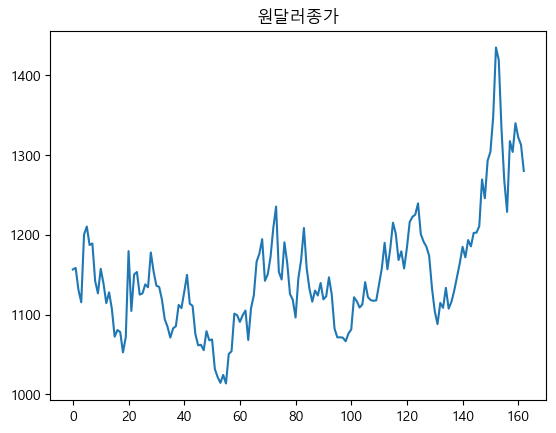

In [100]:
# label plot
plt.title(y.name)
plt.plot(y.index, y.values)

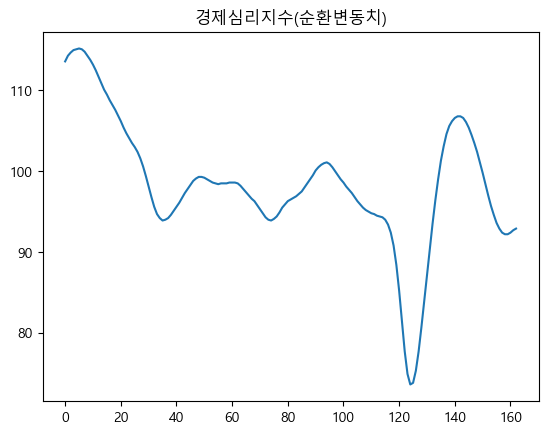

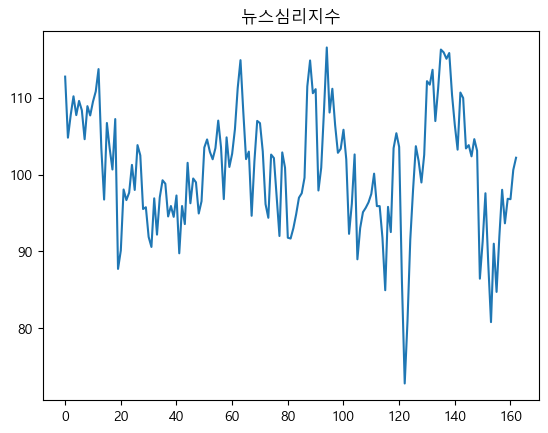

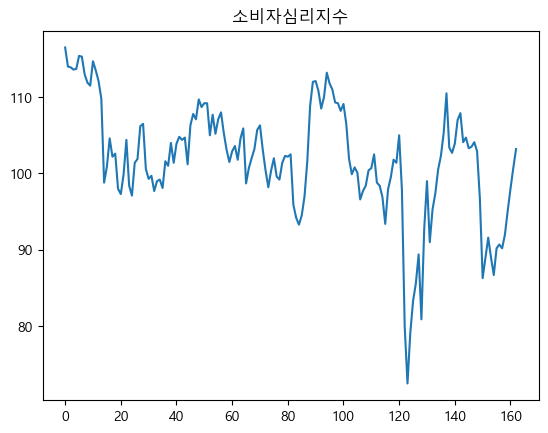

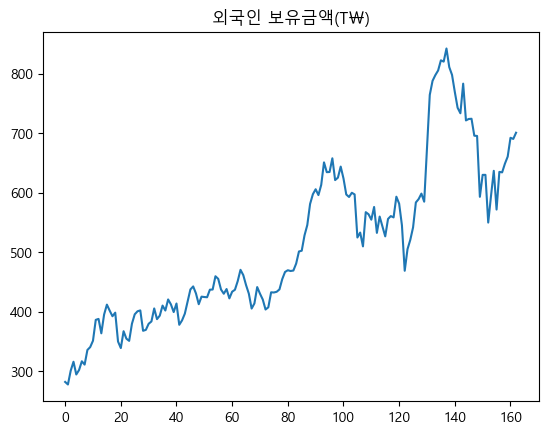

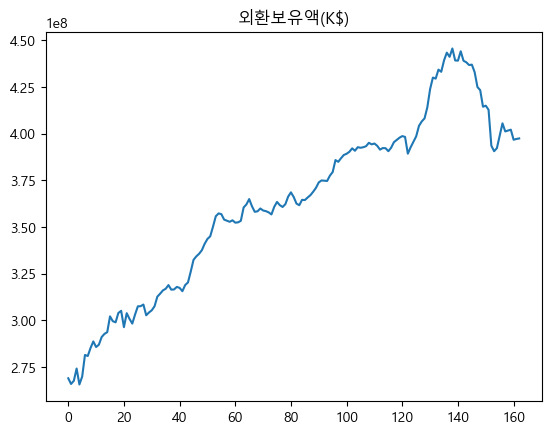

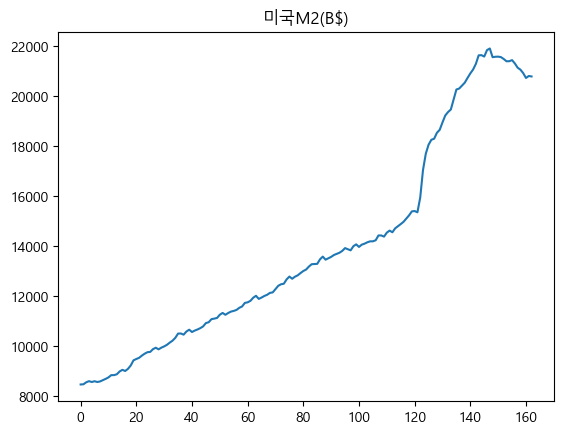

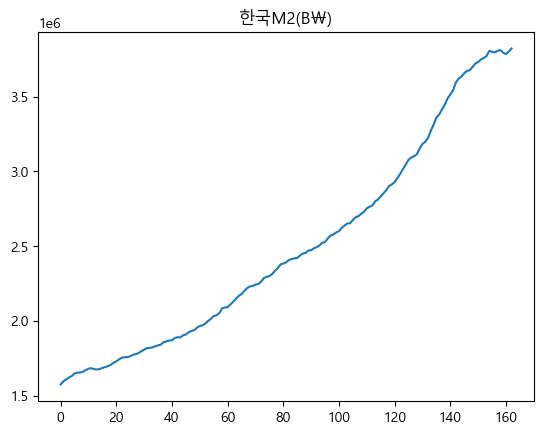

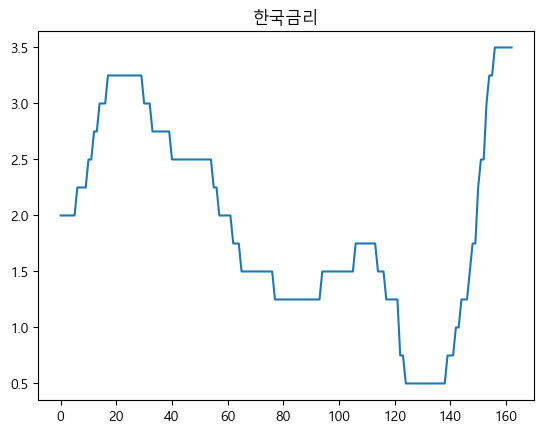

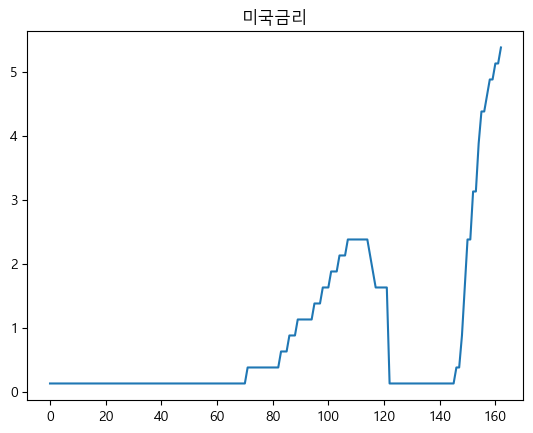

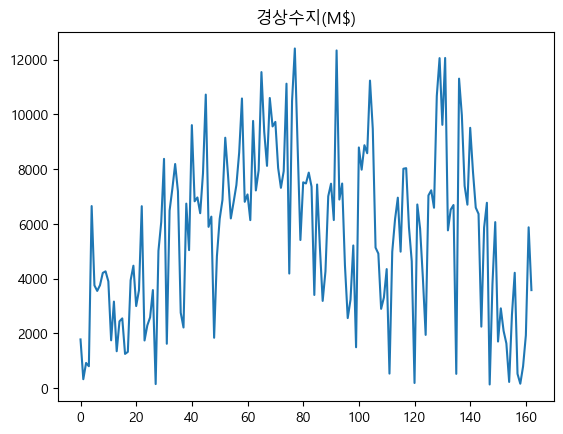

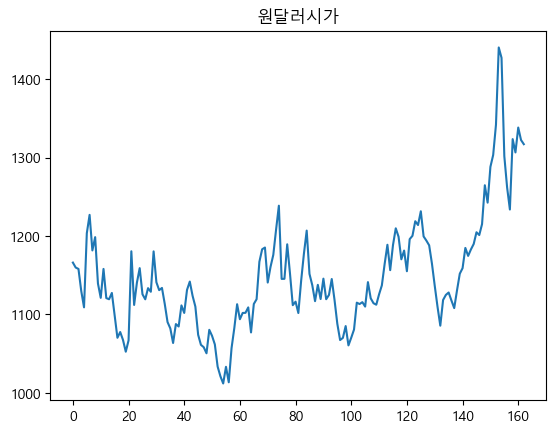

In [101]:
# 각 변수들 plot
for i in range(len(X.columns)):
    plt.plot(X.index, X[X.columns[i]])
    plt.title(X.columns[i])
    plt.show()

<Axes: >

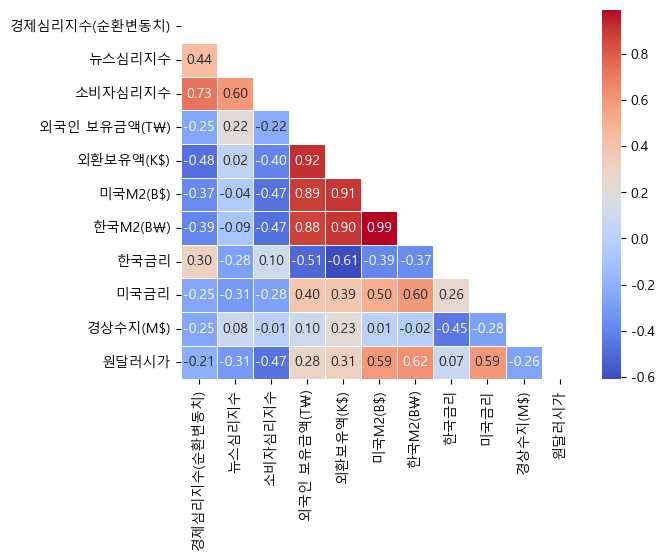

In [102]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

### +정규성 검정

In [103]:
from scipy import stats
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i])
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    print(p_value1)
    if p_value1 < alpha:
        print("데이터는 정규 분포를 따르지 않습니다.")
    else:
        print("데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print("데이터는 정규 분포를 따르지 않습니다.")
    else:
        print("데이터는 정규 분포를 따를 가능성이 있습니다.")
    print(p_value2)
    print(len(a))

경제심리지수(순환변동치)
1.848660389214274e-07
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
0.0022965265896378022
163
뉴스심리지수
0.10336735099554062
데이터는 정규 분포를 따를 가능성이 있습니다.
데이터는 정규 분포를 따를 가능성이 있습니다.
0.17213397163153663
163
소비자심리지수
4.998010990675539e-05
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
7.186924170775328e-06
163
외국인 보유금액(T￦)
1.6971956938505173e-05
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
0.004760608350345678
163
외환보유액(K$)
0.000189897051313892
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
0.0005833614572473236
163
미국M2(B$)
1.8101988796814794e-09
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
1.2630273005541863e-05
163
한국M2(B￦)
3.226162093028506e-08
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
2.086783519372252e-06
163
한국금리
5.997928383294493e-06
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
1.9389752895728875e-05
163
미국금리
3.5346312657646304e-18
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
3.7802937971040014e-17
163
경상수지(M$)
0.010296337306499481
데이터는 정규 분포를 따르지 않습니다.
데이터는 정규 분포를 따르지 않습니다.
0.02231945

In [104]:
# 달러시가를 변돌률로? NO 결과가 않좋아짐
# X[X.columns[10]] = X[X.columns[10]].pct_change() *100

# 데이터 전처리

In [105]:
# # 변수들을 합치면서 label과 단위 통일 (￦/$)
# X['외국인 보유금액/외환보유액'] = X[X.columns[3]] * 1000 / (X[X.columns[4]] / 1000 /1000)
# X['한국M2/미국M2'] = X[X.columns[6]] / X[X.columns[5]]
# X['한국금리/미국금리'] = (100 + X[X.columns[7]]) / (100 + X[X.columns[8]])

In [106]:
# X.columns[3:9]

In [107]:
# X = X.drop(X.columns[3:9],axis=1)

In [108]:
# 지수들을 평균 0, 표준편차 1로 변경
# X[X.columns[0:3]] = (X[X.columns[0:3]] - 100) /10

## 데이터 재탐색

In [109]:
X

,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(T￦),외환보유액(K$),미국M2(B$),한국M2(B￦),한국금리,미국금리,경상수지(M$),원달러시가
0,113.6,112.74,116.5,281.9,268917449,8479.15,1574215.8,2.0,0.13,1776.4,1166.08
1,114.3,104.80,114.0,277.6,265865270,8487.28,1595403.8,2.0,0.13,322.4,1159.80
2,114.7,107.75,113.9,300.8,267567135,8566.14,1607896.1,2.0,0.13,917.1,1158.00
3,115.0,110.18,113.6,315.8,274143774,8611.55,1621176.9,2.0,0.13,796.9,1129.95
4,115.1,107.73,113.7,294.4,265595927,8577.66,1630904.7,2.0,0.13,6650.4,1109.05
...,...,...,...,...,...,...,...,...,...,...,...
158,92.2,93.66,92.0,648.7,401730032,21059.53,3811138.9,3.5,4.88,158.1,1323.44
159,92.2,96.85,95.1,660.6,402190255,20920.88,3793259.9,3.5,4.88,792.6,1306.47
160,92.4,96.80,98.0,692.2,396787900,20726.76,3785013.0,3.5,5.13,1927.2,1338.17
161,92.7,100.60,100.7,690.3,397202408,20806.15,3801207.0,3.5,5.13,5873.7,1322.33


<Axes: >

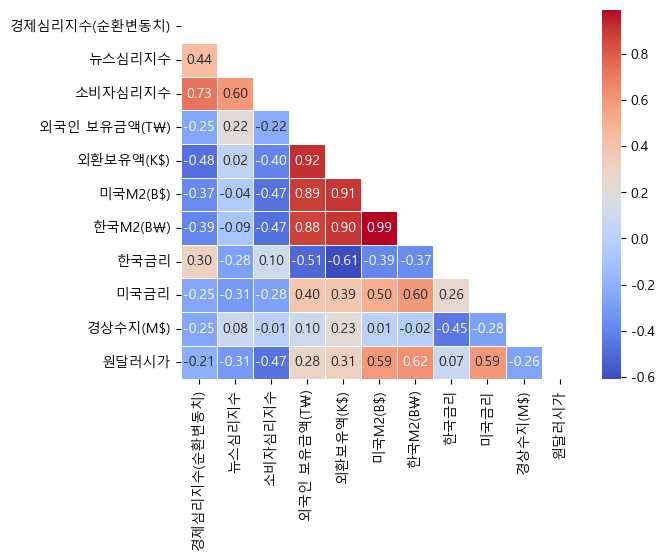

In [110]:
# 상관계수 또 확인
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

In [122]:
import statsmodels.api as sm

In [123]:
# VIF 확인하기 
# X = X.drop(['원달러시가'], axis=1)
# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
vif.sort_values('VIF Factor',ascending=False)

,Feature,VIF Factor
0,const,685.478507
7,한국M2(B￦),487.600726
6,미국M2(B$),316.947040
5,외환보유액(K$),37.569483
4,외국인 보유금액(T￦),15.297972
9,미국금리,13.281529
11,원달러시가,6.126905
8,한국금리,5.722507
3,소비자심리지수,4.038163
1,경제심리지수(순환변동치),3.455672


In [124]:
df = M.drop(['날짜'],axis=1)

<Axes: >

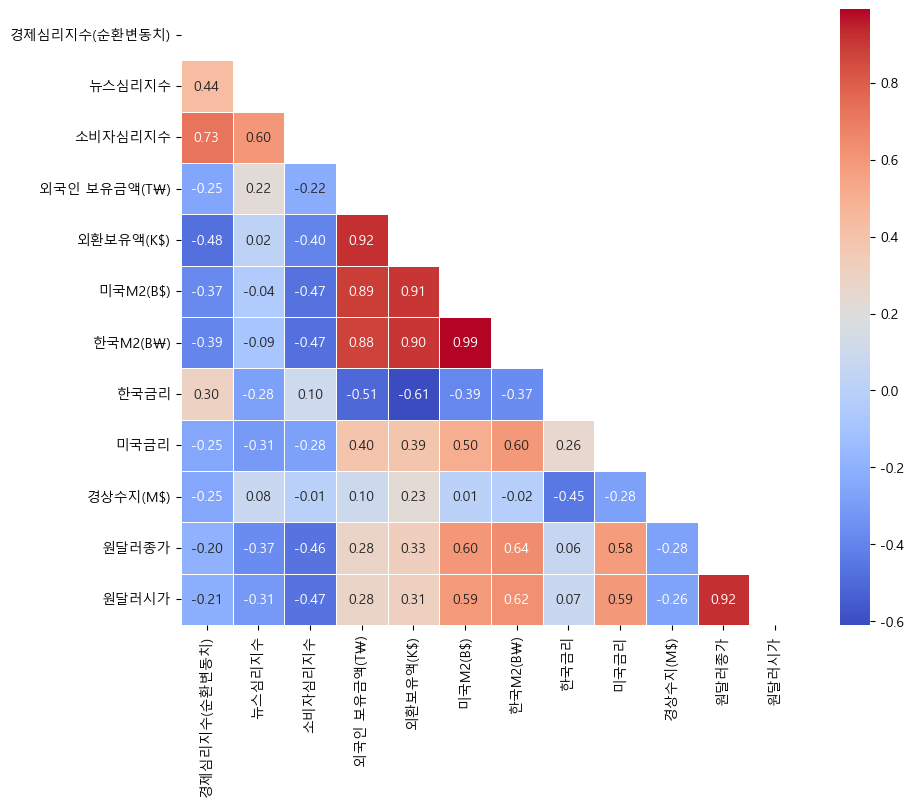

In [125]:
# 변수 다중공정성 보기  

corr_data = df[df.columns].corr()
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_data, dtype=bool))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

In [127]:
np.abs(corr_data.corr()['원달러종가']).sort_values(ascending=False)

원달러종가            1.000000
원달러시가            0.996884
미국금리             0.893778
소비자심리지수          0.874228
뉴스심리지수           0.798589
한국M2(B￦)         0.786008
미국M2(B$)         0.758089
경제심리지수(순환변동치)    0.688838
외환보유액(K$)        0.566280
외국인 보유금액(T￦)     0.506738
경상수지(M$)         0.398285
한국금리             0.054781
Name: 원달러종가, dtype: float64

In [111]:
# VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         Features          VIF
0   경제심리지수(순환변동치)   513.926774
1          뉴스심리지수   461.696004
2         소비자심리지수   729.809271
3    외국인 보유금액(T￦)   232.626097
4       외환보유액(K$)   714.224494
5        미국M2(B$)  3881.447983
6        한국M2(B￦)  6528.905748
7            한국금리    28.502181
8            미국금리    19.567973
9        경상수지(M$)     7.552127
10          원달러시가   595.213782


In [112]:
# 지수 외 변수들을 minmaxscale하기위해 선택
Z = X[X.columns[3:]]

In [113]:
# from sklearn.preprocessing import StandardScaler
# # StandardScaler 객체 생성
# scaler = StandardScaler()
# # 데이터를 표준화
# scaled_data = scaler.fit_transform(Z)

# # 표준화된 데이터 출력
# print("표준화된 데이터:")
# print(scaled_data)


In [114]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# 데이터를 최소-최대 스케일링
scaled_data = scaler.fit_transform(Z)
# 스케일링된 데이터 출력
print("스케일링된 데이터:")
print(scaled_data)

스케일링된 데이터:
[[7.61466265e-03 1.84407177e-02 0.00000000e+00 ... 0.00000000e+00
  1.34067885e-01 3.59776745e-01]
 [0.00000000e+00 1.49536213e-03 6.05508564e-04 ... 0.00000000e+00
  1.56601192e-02 3.45111044e-01]
 [4.10837613e-02 1.09439258e-02 6.47886716e-03 ... 0.00000000e+00
  6.40900355e-02 3.40907499e-01]
 ...
 [7.34195148e-01 7.28363122e-01 9.12181149e-01 ... 9.52380952e-01
  1.46348415e-01 7.61658999e-01]
 [7.30830529e-01 7.30664424e-01 9.18093981e-01 ... 9.52380952e-01
  4.67735105e-01 7.24667803e-01]
 [7.49247388e-01 7.32265771e-01 9.16721346e-01 ... 1.00000000e+00
  2.80847910e-01 7.12150580e-01]]


In [115]:
# 지수들과 scaled 변수들을 합치기
X[X.columns[3:]] = scaled_data

In [116]:
X

,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(T￦),외환보유액(K$),미국M2(B$),한국M2(B￦),한국금리,미국금리,경상수지(M$),원달러시가
0,113.6,112.74,116.5,0.007615,0.018441,0.000000,0.000000,0.5,0.000000,0.134068,0.359777
1,114.3,104.80,114.0,0.000000,0.001495,0.000606,0.009427,0.5,0.000000,0.015660,0.345111
2,114.7,107.75,113.9,0.041084,0.010944,0.006479,0.014985,0.5,0.000000,0.064090,0.340907
3,115.0,110.18,113.6,0.067647,0.047457,0.009861,0.020893,0.5,0.000000,0.054301,0.275402
4,115.1,107.73,113.7,0.029750,0.000000,0.007337,0.025221,0.5,0.000000,0.530986,0.226594
...,...,...,...,...,...,...,...,...,...,...,...
158,92.2,93.66,92.0,0.657163,0.755801,0.936965,0.995222,1.0,0.904762,0.002280,0.727260
159,92.2,96.85,95.1,0.678236,0.758356,0.926639,0.987268,1.0,0.904762,0.053951,0.687630
160,92.4,96.80,98.0,0.734195,0.728363,0.912181,0.983599,1.0,0.952381,0.146348,0.761659
161,92.7,100.60,100.7,0.730831,0.730664,0.918094,0.990804,1.0,0.952381,0.467735,0.724668


In [117]:
# VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         Features          VIF
0   경제심리지수(순환변동치)   496.327990
1          뉴스심리지수   396.555798
2         소비자심리지수   715.993065
3    외국인 보유금액(T￦)    50.397572
4       외환보유액(K$)   136.531623
5        미국M2(B$)   861.047529
6        한국M2(B￦)  1364.471347
7            한국금리    17.966802
8            미국금리    17.668077
9        경상수지(M$)     7.479063
10          원달러시가    25.148698


In [118]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.
ridge = Ridge(alpha=alpha)

# 모델 훈련
ridge.fit(X_train, y_train)

# 훈련된 모델을 사용하여 예측
y_pred = ridge.predict(X_test)

# 모델 평가 (예: 평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("RMSE:",rmse)
print("R2:", r2)

# Ridge 회귀 모델의 계수 출력
print("Ridge 회귀 모델의 계수:", ridge.coef_)


평균 제곱 오차(MSE): 849.167708822544
RMSE: 29.140482302503916
R2: 0.8684243636160573
Ridge 회귀 모델의 계수: [  1.55535615  -1.24420275  -0.99871649 -62.52418503 -54.63232107
  66.65159912  80.92706365 -16.19022884  31.36481025 -14.8657224
 183.40451661]


In [119]:
from sklearn.model_selection import GridSearchCV, train_test_split
# ElasticNet 회귀 모델 생성
elastic_net = ElasticNet()
# 탐색할 alpha와 l1_ratio 매개변수 그리드 설정
param_grid = {
    'alpha': [0, 0.1, 1.0, 10.0],     # alpha 후보 값
    'l1_ratio': [0, 0.1, 0.5, 0.9]   # l1_ratio 후보 값
}

# GridSearchCV를 사용하여 최적의 alpha와 l1_ratio 찾기
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 alpha와 l1_ratio 출력
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print("최적의 alpha:", best_alpha)
print("최적의 l1_ratio:", best_l1_ratio)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가 (예: 평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("RMSE:",rmse)
print("R2:", r2)

NameError: name 'ElasticNet' is not defined

In [ ]:
from sklearn.linear_model import ElasticNet

# ElasticNet 회귀 모델 생성
alpha = 1.0  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.
l1_ratio = 0.5  # l1_ratio는 L1 규제의 비율을 나타냅니다. 0.5는 L1과 L2 규제를 동일하게 조절합니다.
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# 모델 훈련
elastic_net.fit(X_train, y_train)

# 훈련된 모델을 사용하여 예측
y_pred = elastic_net.predict(X_test)

# 모델 평가 (예: 평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("RMSE:",rmse)
print("R2:", r2)
# ElasticNet 회귀 모델의 계수 출력
print("ElasticNet 회귀 모델의 계수:", elastic_net.coef_)


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)
# 이건 뭐에 대한 score 인가?? 
score =lr_model.score(X_test, y_test)

print('선형회귀 모델 R2: {0:.2f}'.format(score))
score

In [ ]:
# Cofficient 값을 버리고, 부호만 살리는건 어때요??
coef=pd.Series(data=np.round(lr_model.coef_,5), index=X.columns)
coef

In [ ]:
# 이 시각화는 왜 이모냥인겁니까?? 
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()
# 단위가 달라서 회귀계수는 큰 의미 없다.

In [ ]:
coef_sort

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)

In [ ]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

In [ ]:
# 에측결과 시각화, 왜 에러가 날까요??
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(lr)':y_pred,'diff(lr)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

In [ ]:
# 의사결정회귀
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

score=tree_model.score(X_test,y_test)
print('의사결정회귀 R2: {0:.2f}'.format(score))

In [ ]:
X_train.columns[4]

In [ ]:
tree_model.feature_importances_

In [ ]:
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)} )
tree_df.sort_values(by=['diff(tree)'],ascending=False).head(10)

In [ ]:
# 이거 PPT 에 사용하면 좋겠슴당!! 
sns.lineplot(data=tree_df)

In [ ]:
!pip install lightgbm

In [ ]:
# 이건 왜 다 같은 값이 나올까요?? 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [ ]:
model_list = [forest_model, lgb_model, xgb_model]
for model in model_list:
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_name = model.__class__,__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name,score))

In [ ]:
forest_model.feature_importances_

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:.3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse, rmse, r2))

In [ ]:
# 이건 왜 에러가 날까요?
model_list=[lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)
    print('{0} 모델'.format(model.__class__.__name__))
    printRegressorResult(y_test, y_preds)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=5)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))

In [ ]:
X_selected

In [ ]:
X[features]

In [ ]:
X_selected = X[features]
X_train, X_test, y_train, y_test= train_test_split(X_selected,y,test_size=0.3, random_state=42)
lr_model2=LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test,y_pred)

# 왜 점수가 요렇게 나오까요? 

In [ ]:
# polynomialFeatures() 사용하여 2차원 다항회귀모델

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model=LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

In [ ]:
# 데이터 전처리 

from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3=LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test,y_pred)

In [ ]:
y.to_frame()

In [ ]:
# 데이터 분포 확인- 히스토그램 
nrows=1
ncols=4

fig,axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=X_selected.columns[3], data=X_selected, kde=True, bins=30, ax=axs[3])


sns.histplot(x=y, data=y.to_frame(), kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_model, X, y, scoring='neg_mean_squared_error', cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse=(-1*scores['train_score'])
print('MSE:', mse)

rmse=np.sqrt(-1*scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균:{0:.3f}'.format(np.mean(rmse)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

lgb_model=LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

In [ ]:
model_list=[lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    y_preds=model.predict(X_test)
    mse=mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_preds)
    model_name=model.__class__.__name__
    print('{0} MSE:{1:.3f}, RMSE:{2:.3f}, r2:{3:.3f}'.format(model_name, mse, rmse,r2))

In [ ]:
X[X.columns[0:3]] = (X[X.columns[0:3]] -100) /10

In [ ]:
X

In [ ]:
np.log1p(X[X.columns[4]].diff(1).dropna()).hist()

In [ ]:
np.log1p(X[X.columns[4]]).diff(1).dropna().hist()

In [ ]:
loged_scaled_y = np.log1p(y)
loged_scaled_y_test = np.log1p(y_test)

In [ ]:
X[X.columns[6]].diff(1).dropna()

In [ ]:
from scipy import stats
data = np.random.randn(100)  # 예시 데이터 (평균 0, 표준 편차 1의 표준 정규 분포에서 추출한 데이터)

# 정규성 검정 수행
statistic, p_value = stats.shapiro(np.log1p(X[X.columns[4]]).diff(1))

# 결과 출력
alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
print(p_value)
if p_value < alpha:
    print("데이터는 정규 분포를 따르지 않습니다.")
else:
    print("데이터는 정규 분포를 따를 가능성이 있습니다.")


In [ ]:
b = 7
a = X[X.columns[b]]
print(X.columns[b])
statistic, p_value1 = stats.shapiro(a)

alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
print(p_value1)
if p_value1 < alpha:
    print("데이터는 정규 분포를 따르지 않습니다.")
else:
    print("데이터는 정규 분포를 따를 가능성이 있습니다.")

statistic, p_value2 = stats.normaltest(a)
if p_value2 < alpha:
    print("데이터는 정규 분포를 따르지 않습니다.")
else:
    print("데이터는 정규 분포를 따를 가능성이 있습니다.")
print(p_value2)
print(len(a))

In [ ]:
len(np.log1p(X[X.columns[4]]).diff(1).diff(12).dropna())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)
# 이건 뭐에 대한 score 인가?? 
score =lr_model.score(X_test, y_test)

print('선형회귀 모델 R2: {0:.2f}'.format(score))
score

In [ ]:
coef=pd.Series(data=np.round(lr_model.coef_,5), index=X.columns)
coef

In [ ]:
# 이 시각화는 왜 이모냥인겁니까?? 
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()
# 단위가 달라서 회귀계수는 큰 의미 없다.

In [ ]:
def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)